# Steps to build a Neural Network using Keras

<ol>1. Loading the dataset</ol>
<ol>2. Creating training and validation set</ol>
<ol>3. Defining the architecture of the model</ol>
<ol>4. Compiling the model (defining loss function, optimizer)</ol>
<ol>5. Training the model</ol>
<ol>6. Evaluating model performance on training and validation set</ol>

## 1. Loading the dataset

In [3]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# loading the pre-processed dataset
data = pd.read_csv('loan_prediction_data.csv')

In [6]:
# looking at the first five rows of the dataset
data.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002     0.0      0.0    0.000000        1.0            0.0   
1  LP001003     0.0      1.0    0.333333        1.0            0.0   
2  LP001005     0.0      1.0    0.000000        1.0            1.0   
3  LP001006     0.0      1.0    0.000000        0.0            0.0   
4  LP001008     0.0      0.0    0.000000        1.0            0.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.070489           0.000000    0.198860           0.74359   
1         0.054830           0.036192    0.172214           0.74359   
2         0.035250           0.000000    0.082489           0.74359   
3         0.030093           0.056592    0.160637           0.74359   
4         0.072356           0.000000    0.191027           0.74359   

   Credit_History  Property_Area  Loan_Status  
0             1.0            1.0          1.0  
1             1.0            0.0          0.0  
2             1.0            1.0          1.0  
3             1.0            1.0          1.0  
4             1.0            1.0          1.0

In [7]:
# checking missing values
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
# checking the data type
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [9]:
# removing the loan_ID since these are just the unique values
data = data.drop('Loan_ID', axis=1)

In [10]:
# looking at the shape of the data
data.shape

(614, 12)

In [11]:
# separating the independent and dependent variables

# storing all the independent variables as X
X = data.drop('Loan_Status', axis=1)

# storing the dependent variable as y
y = data['Loan_Status']

In [12]:
# shape of independent and dependent variables
X.shape, y.shape

((614, 11), (614,))

## 2. Creating training and validation set

In [13]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=data['Loan_Status'],random_state=10,test_size=0.2)

In [14]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

## 3. Defining the architecture of the model

In [15]:
# import keras
import keras

# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense 

In [16]:
# number of input neurons
X_train.shape

(491, 11)

In [17]:
# number of features in the data
X_train.shape[1]

11

In [18]:
# defining input neurons
input_neurons = X_train.shape[1]

# define number of output neurons
output_neurons = 1

In [19]:
# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

In [20]:
# defining the architecture of the model using Sequential API
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [21]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [22]:
from keras import Input, Model

In [23]:
# defining the architecture of the model using Functional API
x = Input(shape = (input_neurons,))
hidden1 = Dense(units=neuron_hidden_layer_1, activation='relu')(x)
hidden2 = Dense(units=neuron_hidden_layer_2, activation='relu')(hidden1)
output = Dense(units=output_neurons, activation='sigmoid')(hidden2)

model_functional = Model(x, output) 

In [24]:
# summary of the model
model_functional.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## 4. Compiling the model (defining loss function, optimizer)

In [25]:
# compiling the model

# loss as binary_crossentropy, since we have binary classification problem
# defining the optimizer as adam
# Evaluation metric as accuracy

model_functional.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

## 5. Training the model

In [26]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 9ms/step - loss: 0.6863 - accuracy: 0.5580 - val_loss: 0.6787 - val_accuracy: 0.6179
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6741 - val_loss: 0.6632 - val_accuracy: 0.6911
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6522 - accuracy: 0.7475 - val_loss: 0.6474 - val_accuracy: 0.7642
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6359 - accuracy: 0.7658 - val_loss: 0.6326 - val_accuracy: 0.7480
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6209 - accuracy: 0.7699 - val_loss: 0.6176 - val_accuracy: 0.7642
Epoch 6/50
16/16 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7780 - val_loss: 0.6018 - val_accuracy: 0.7561
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5881 - accuracy: 0.7821 - val_loss: 0.5870 - val_accuracy: 0.7561
Epoch 8/50
16/16 [==

## 6. Evaluating model performance on validation set

In [32]:
# getting predictions for the validation set
prediction = model_functional.predict(X_test)

In [33]:
prediction

array([[0.75872314],
       [0.8801768 ],
       [0.7574488 ],
       [0.6964766 ],
       [0.8396251 ],
       [0.7912804 ],
       [0.82882035],
       [0.77931345],
       [0.8859644 ],
       [0.72118616],
       [0.745682  ],
       [0.76003915],
       [0.72532403],
       [0.8900986 ],
       [0.74435145],
       [0.90275824],
       [0.65330195],
       [0.72487956],
       [0.8137821 ],
       [0.6730451 ],
       [0.74117374],
       [0.8822712 ],
       [0.7044562 ],
       [0.73524654],
       [0.7520158 ],
       [0.8736911 ],
       [0.71440554],
       [0.72246754],
       [0.7527795 ],
       [0.72180486],
       [0.81508446],
       [0.89354986],
       [0.86867225],
       [0.05613995],
       [0.10504407],
       [0.08302122],
       [0.8322352 ],
       [0.84843004],
       [0.8459517 ],
       [0.9163079 ],
       [0.8390777 ],
       [0.80290484],
       [0.87066805],
       [0.84149486],
       [0.04677713],
       [0.8966224 ],
       [0.577365  ],
       [0.770

In [37]:
# Recall y_test has 123 records
prediction = prediction.reshape(123,)
prediction.reshape(123,)

ValueError: cannot reshape array of size 123 into shape (2,)

In [ ]:
prediction = prediction.reshape(123,)

# converting probabilities to classes
prediction_int = prediction >= 0.5
prediction_int = prediction_int.astype(np.int)

In [27]:
# calculating the accuracy on validation set
accuracy_score(y_test, prediction_int)

0.8130081300813008

### Visualizing the model performance

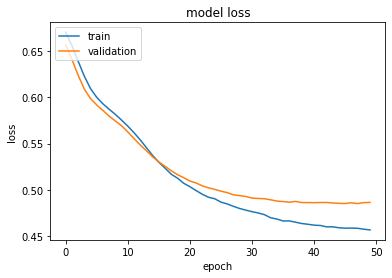

In [28]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

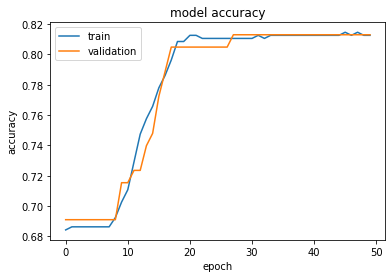

In [29]:
# summarize history for accuracy
plt.plot(model_history.history['acc'])
plt.plot(model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()